In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
contracts = pd.read_csv('metadata.csv', index_col='Ticker', parse_dates=True)

In [3]:
contracts.head()

,Exchange,Name,Sector,Sub-sector,Months,Number of Contracts,Quandl Code
Ticker,,,,,,,
AD,CME,Australian Dollar,Fx,Major,HMUZ,2,CHRIS/CME_AD
AL,MCX,Aluminium,Metals,Base,FGHJKMNQUVXZ,2,CHRIS/MCX_AL
B,ICE,Brent Crude Oil,Energy,Oil,FGHJKMNQUVXZ,25,CHRIS/ICE_B
BO,CME,Soybean Oil,Agriculture,Grain,FHKNQUVZ,10,CHRIS/CME_BO
BP,CME,British Pound,Fx,Major,HMUZ,2,CHRIS/CME_BP


In [4]:
start_date = '2015-01-01'
periods = 252

In [5]:
files = contracts.index.tolist()
his = pd.DataFrame()
for file in files:
    his[file] = pd.read_csv('data/{}.csv'.format(file), 
                             usecols=['Date', 'Close'],
                             index_col=['Date'],
                             parse_dates=True).squeeze()
his = his.loc[his.index > start_date]

In [6]:
#get contract availability dates
contract_symbols = contracts['Quandl Code'].str.split('/').apply(lambda x: x[1]) + '1'
contract_symbols = contract_symbols.to_frame()
contract_symbols.rename(columns={'Quandl Code': 'code'}, inplace=True)
meta = pd.read_csv('CHRIS_metadata.csv', parse_dates=['from_date', 'to_date'])
meta = meta.merge(contract_symbols, on='code', how='inner')
min_max = [meta['from_date'].max(), meta['to_date'].min()]
meta = meta[meta['from_date'] < start_date]
meta = meta[meta['to_date'] == meta['to_date'].max()]
mask = meta['code'].apply(lambda x: x.split('_')[1][:-1]).tolist()

In [7]:
his = his[mask]
his = his[-periods:]

In [8]:
his

,AD,BO,BP,BR,C,CB,CD,CL,CSC,DA,...,ZR,ECO,FCE,I,Z,AL,CRDM,NI,PB,ZN
Date,,,,,,,,,,,,,,,,,,,,,
2017-12-08,0.7510,33.49,1.3387,0.30275,340.00,223.925,0.77835,57.34,1.653,15.61,...,13.66575,364.75,5399.5,100.320,7396.0,131.80,1050.0,722.0,160.15,199.85
2017-12-11,0.7525,33.36,1.3341,0.30170,336.50,223.000,0.77790,58.02,1.656,15.63,...,13.61475,362.50,5386.5,100.325,7444.0,132.50,1050.0,740.1,161.10,201.50
2017-12-12,0.7558,33.45,1.3321,0.30180,336.00,223.775,0.77725,57.45,1.656,15.60,...,13.68925,360.75,5427.5,100.330,7498.5,130.45,1050.0,735.8,163.50,204.60
2017-12-13,0.7637,33.15,1.3422,0.30130,337.50,223.800,0.78055,56.67,1.659,15.52,...,13.45000,358.75,5399.5,100.330,7503.5,132.10,1050.0,733.0,163.45,203.75
2017-12-14,0.7671,32.95,1.3434,0.29915,337.25,224.750,0.78150,57.17,1.661,15.52,...,13.50450,358.00,5357.5,100.330,7461.5,133.95,1050.0,738.2,161.05,205.05
2017-12-15,0.7647,33.32,1.3330,0.30270,347.00,NaN,0.77720,57.36,1.659,15.50,...,13.17950,359.75,5342.0,100.330,7427.0,134.20,1050.0,760.2,161.65,205.85
2017-12-18,0.7669,33.12,1.3404,0.30400,347.00,224.025,0.77735,57.29,1.657,15.49,...,12.94925,358.50,5415.5,100.329,7474.5,134.00,1050.0,769.7,163.65,205.25
2017-12-19,0.7661,33.22,1.3440,0.30270,347.50,223.750,0.77590,57.49,1.656,15.48,...,12.86175,356.00,5383.5,100.325,7483.0,135.00,1120.0,757.3,163.75,206.05
2017-12-20,0.7665,32.96,1.3428,0.30390,349.00,223.000,0.78045,58.03,1.650,15.43,...,12.88650,351.50,5352.5,100.330,7460.5,135.70,1120.0,781.7,162.35,206.90


In [9]:
returns = np.log(his.pct_change()+1)[1:]

In [10]:
corr = returns.corr()

In [11]:
# quick sanity check
print('S&P vs NAS: ', corr.loc['ES', 'NQ'])
print('S&P vs. oil: ', corr.loc['ES', 'CL'])
print('Treasuries vs. Fed Funds: ', corr.loc['US', 'FF'])

S&P vs NAS:  0.930339963094315
S&P vs. oil:  0.3252671139500171
Treasuries vs. Fed Funds:  0.010300802884968019


In [12]:
sector_series = contracts[['Sector', 'Sub-sector']]
name_series = contracts['Name']
def get_sector(root_symbol):
    return sector_series.loc[root_symbol,:].values.tolist()
def get_name(root_symbol):
    return str(name_series[root_symbol])

In [13]:
get_sector('ES')

['Equities', 'US']

In [14]:
get_name('ES')

'E-mini S&P 500 Index'

# Contract Reference List 

In [15]:
sect_dict = {symbol: get_sector(symbol) for symbol in his.columns}
sectors = pd.DataFrame(sect_dict).T
sectors.columns = ['sector', 'sub-sector']
sectors['name'] = sectors.index.map(get_name)
sectors

,sector,sub-sector,name
AD,Fx,Major,Australian Dollar
BO,Agriculture,Grain,Soybean Oil
BP,Fx,Major,British Pound
BR,Fx,EM,Brazilian Real
C,Agriculture,Grain,Corn
CB,Agriculture,Dairy,Cash-settled Butter
CD,Fx,Major,Canadian Dollar
CL,Energy,Oil,WTI Crude Oil
CSC,Agriculture,Dairy,Cash-Settled Cheese
DA,Agriculture,Dairy,Class III Milk


In [16]:
sns.set_style('whitegrid')
#colormap = sns.diverging_palette(220, 10, as_cmap=True)
colormap = sns.diverging_palette(133, 10, n=5, as_cmap=True)

# Single Contract Correlation by Sector

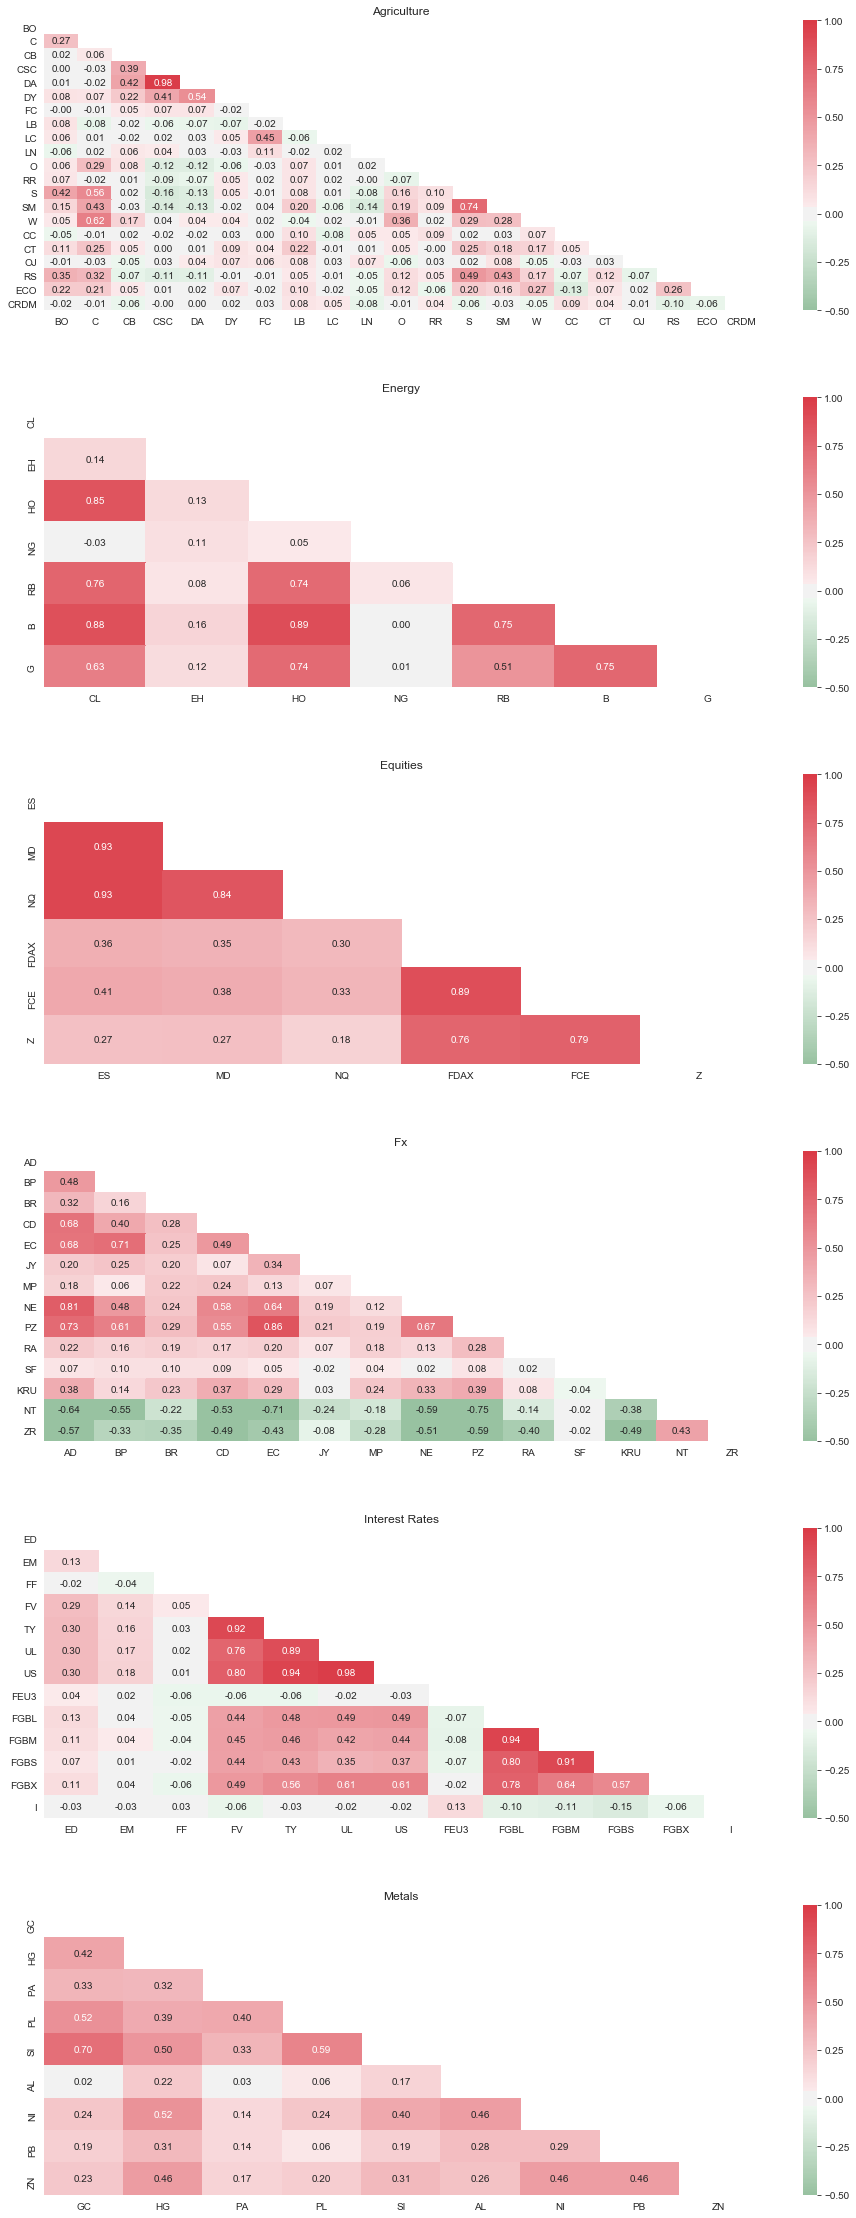

In [17]:
corr_by_sector = {}
for sector, symbols in sectors.groupby('sector').groups.items():
    corr_by_sector[sector] = returns[symbols].corr()

fig = plt.figure(figsize=(16,40))
fig.subplots_adjust(hspace=.3, wspace=.05)
rows = np.ceil(len(corr_by_sector.keys()))
index = 0
for sector, table in corr_by_sector.items():
    index += 1
    dropSelf = np.zeros_like(table)
    dropSelf[np.triu_indices_from(dropSelf)] = True
    ax = fig.add_subplot(rows, 1, index)
    sns.heatmap(table, cmap=colormap, annot=True, fmt=".2f", 
                vmin=-.5, vmax=1, center=0, mask=dropSelf, ax=ax).set_title(sector);

# Single Contract Correlation by Sub-sector

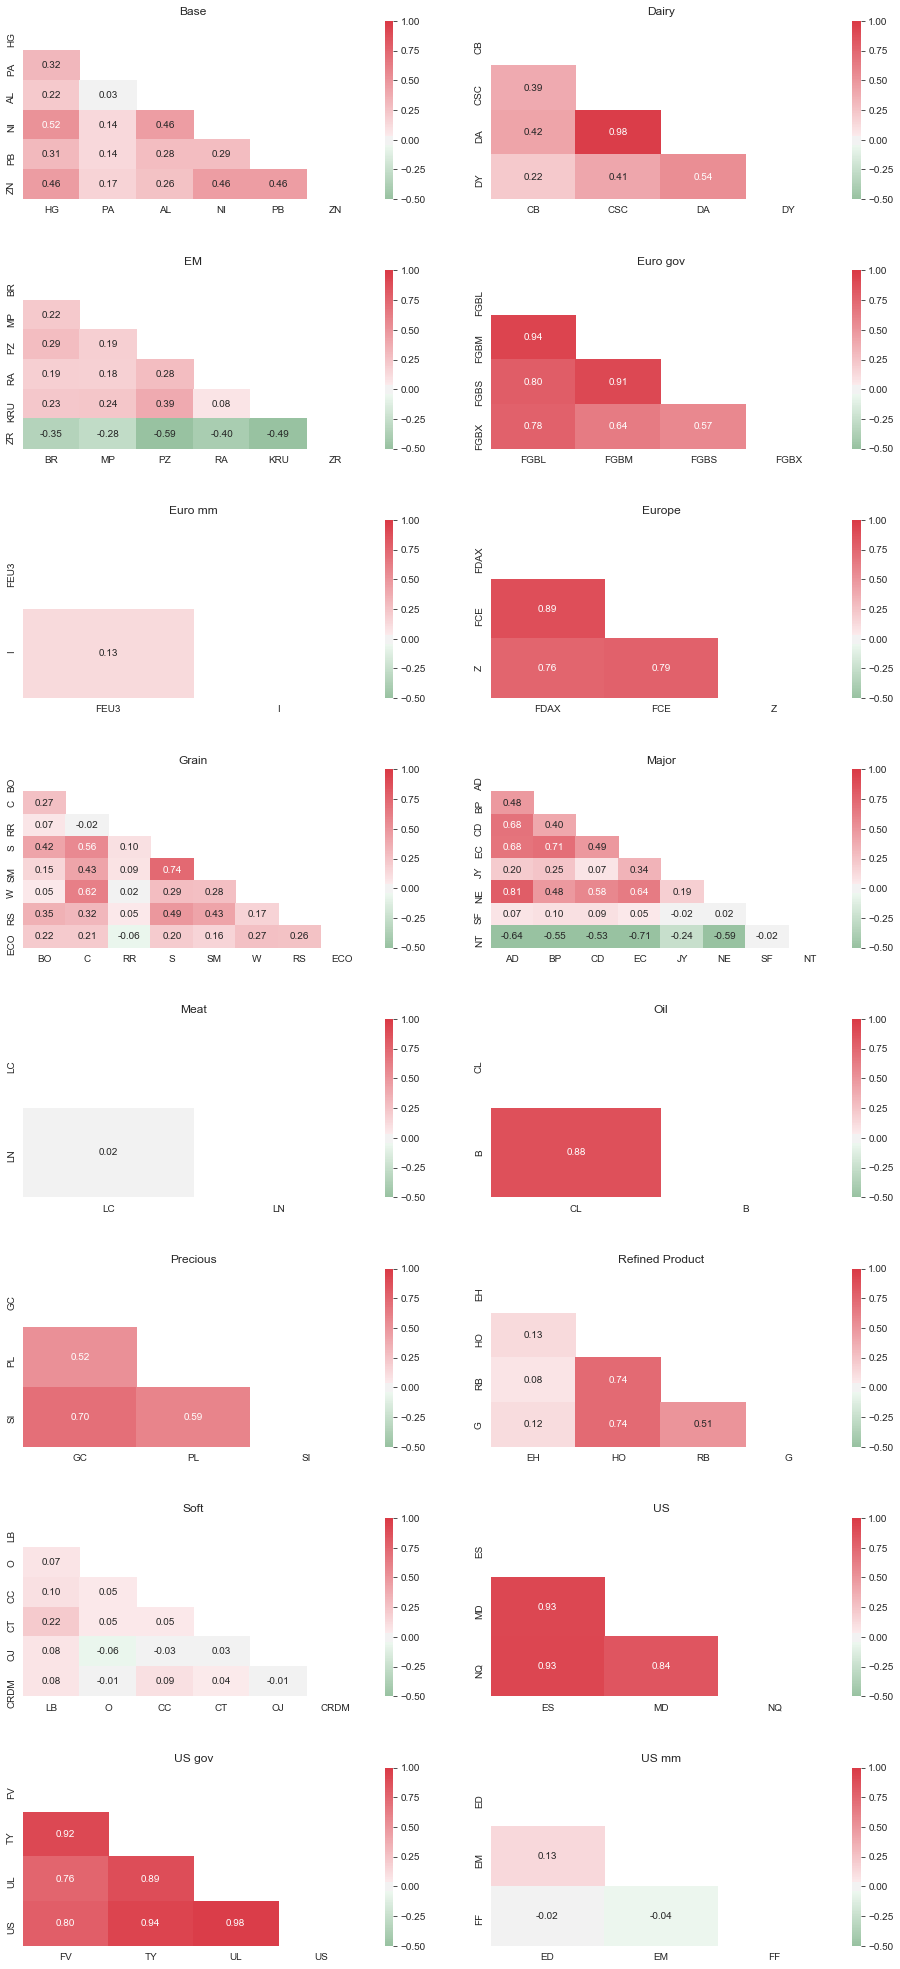

In [18]:
corr_by_sub_sector = {}
for sector, symbols in sectors.groupby('sub-sector').groups.items():
    corr_by_sub_sector[sector] = returns[symbols].corr()

fig = plt.figure(figsize=(16,40))
fig.subplots_adjust(hspace=.4, wspace=.1)
rows = np.ceil(len(corr_by_sub_sector.keys())/2)
index = 0
for sector, table in corr_by_sub_sector.items():
    if table.shape == (1,1):
        continue
    index += 1
    dropSelf = np.zeros_like(table)
    dropSelf[np.triu_indices_from(dropSelf)] = True
    ax = fig.add_subplot(rows, 2, index)
    sns.heatmap(table, cmap=colormap, annot=True, fmt=".2f", 
                vmin=-.5, vmax=1, center=0, mask=dropSelf, ax=ax).set_title(sector);

# Sector Indices Correlation

In [19]:
sector_index = pd.DataFrame()
for sector, symbols in sectors.groupby('sector').groups.items():
    df = his[symbols].copy()
    df= df.pct_change()[1:]
    ind = df.apply(lambda x: np.average(x), axis=1)
    sector_index[sector] = ind

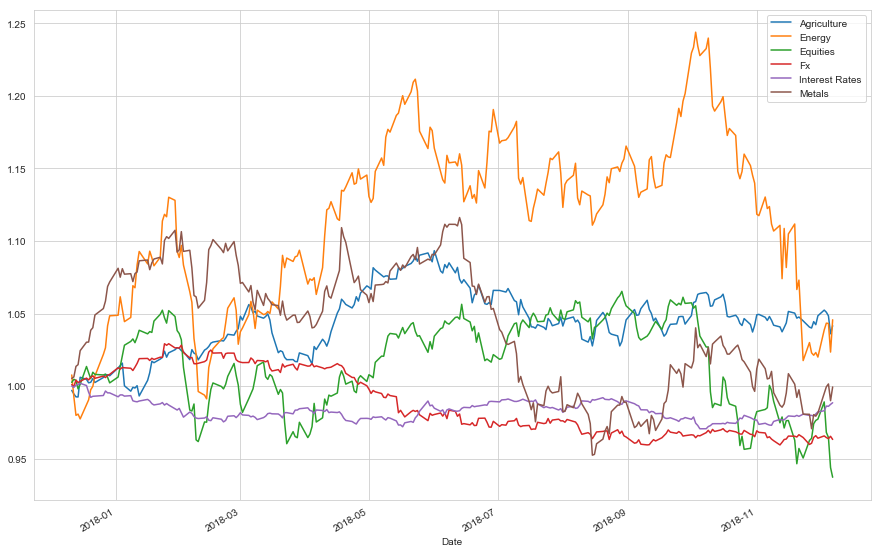

In [20]:
(sector_index + 1).cumprod().plot(grid=True, figsize=(15,10));

In [21]:
sector_returns = np.log(sector_index + 1)

In [22]:
sector_corr = sector_returns.corr()

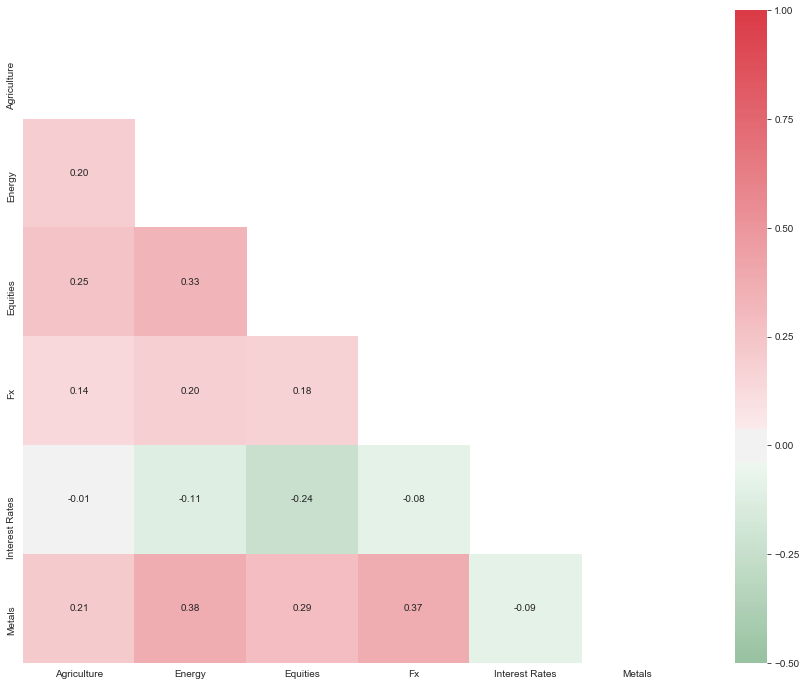

In [23]:
plt.figure(figsize=(15,12))
dropSelf = np.zeros_like(sector_corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
sns.heatmap(sector_corr, cmap=colormap, annot=True, fmt=".2f", vmin=-.5, vmax=1, center=0, mask=dropSelf);

For reference list of contracts in every sector

In [24]:
dict(sectors.groupby('sector').groups)

{'Agriculture': Index(['BO', 'C', 'CB', 'CSC', 'DA', 'DY', 'FC', 'LB', 'LC', 'LN', 'O', 'RR',
        'S', 'SM', 'W', 'CC', 'CT', 'OJ', 'RS', 'ECO', 'CRDM'],
       dtype='object'),
 'Energy': Index(['CL', 'EH', 'HO', 'NG', 'RB', 'B', 'G'], dtype='object'),
 'Equities': Index(['ES', 'MD', 'NQ', 'FDAX', 'FCE', 'Z'], dtype='object'),
 'Fx': Index(['AD', 'BP', 'BR', 'CD', 'EC', 'JY', 'MP', 'NE', 'PZ', 'RA', 'SF', 'KRU',
        'NT', 'ZR'],
       dtype='object'),
 'Interest Rates': Index(['ED', 'EM', 'FF', 'FV', 'TY', 'UL', 'US', 'FEU3', 'FGBL', 'FGBM',
        'FGBS', 'FGBX', 'I'],
       dtype='object'),
 'Metals': Index(['GC', 'HG', 'PA', 'PL', 'SI', 'AL', 'NI', 'PB', 'ZN'], dtype='object')}

# Sub-sector Indices Correlation

In [25]:
sub_sector_index = pd.DataFrame()
for sector, symbols in sectors.groupby('sub-sector').groups.items():
    df = his[symbols].copy()
    df=df.pct_change()[1:]
    ind = df.apply(lambda x: np.average(x), axis=1)
    sub_sector_index[sector] = ind

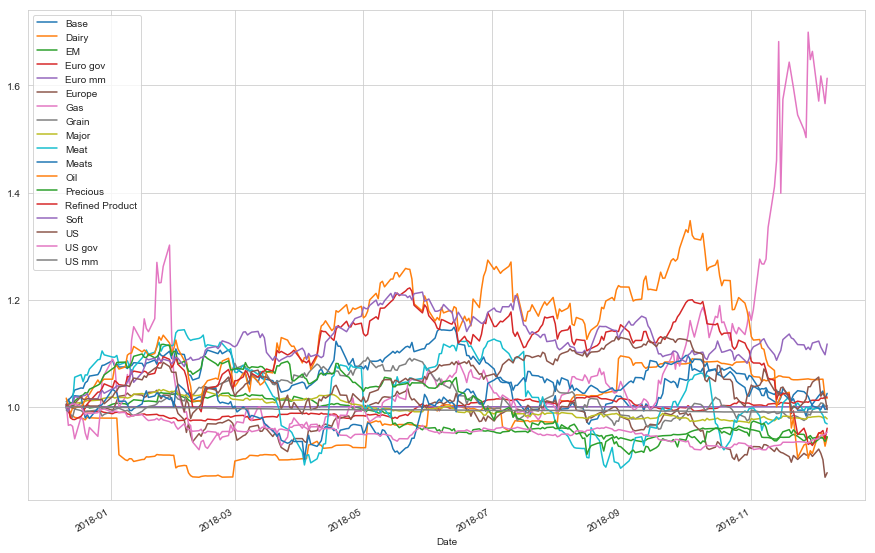

In [26]:
(sub_sector_index + 1).cumprod().plot(grid=True, figsize=(15,10));

In [27]:
sub_sector_returns = np.log(sub_sector_index + 1)

In [28]:
sub_sector_corr = sub_sector_returns.corr()

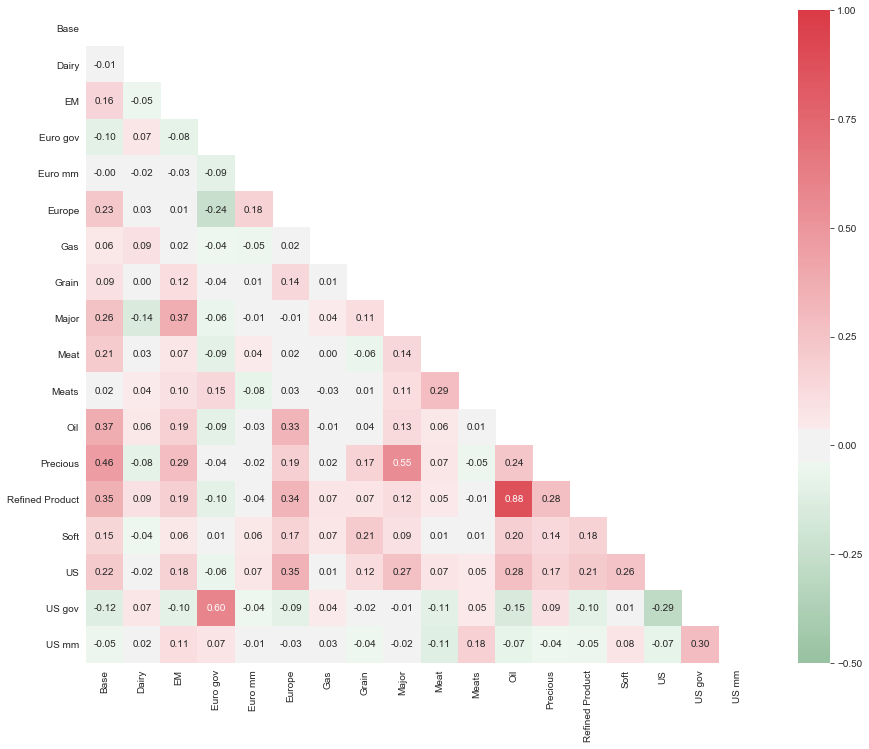

In [29]:
plt.figure(figsize=(15,12))
dropSelf = np.zeros_like(sub_sector_corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
sns.heatmap(sub_sector_corr, cmap=colormap, annot=True, fmt=".2f", vmin=-.5, vmax=1, center=0, mask=dropSelf);

For reference: list of contracts in every sub-sector

In [30]:
dict(sectors.groupby('sub-sector').groups)

{'Base': Index(['HG', 'PA', 'AL', 'NI', 'PB', 'ZN'], dtype='object'),
 'Dairy': Index(['CB', 'CSC', 'DA', 'DY'], dtype='object'),
 'EM': Index(['BR', 'MP', 'PZ', 'RA', 'KRU', 'ZR'], dtype='object'),
 'Euro gov': Index(['FGBL', 'FGBM', 'FGBS', 'FGBX'], dtype='object'),
 'Euro mm': Index(['FEU3', 'I'], dtype='object'),
 'Europe': Index(['FDAX', 'FCE', 'Z'], dtype='object'),
 'Gas': Index(['NG'], dtype='object'),
 'Grain': Index(['BO', 'C', 'RR', 'S', 'SM', 'W', 'RS', 'ECO'], dtype='object'),
 'Major': Index(['AD', 'BP', 'CD', 'EC', 'JY', 'NE', 'SF', 'NT'], dtype='object'),
 'Meat': Index(['LC', 'LN'], dtype='object'),
 'Meats': Index(['FC'], dtype='object'),
 'Oil': Index(['CL', 'B'], dtype='object'),
 'Precious': Index(['GC', 'PL', 'SI'], dtype='object'),
 'Refined Product': Index(['EH', 'HO', 'RB', 'G'], dtype='object'),
 'Soft': Index(['LB', 'O', 'CC', 'CT', 'OJ', 'CRDM'], dtype='object'),
 'US': Index(['ES', 'MD', 'NQ'], dtype='object'),
 'US gov': Index(['FV', 'TY', 'UL', 'US'], dty